x^2 transform is used with left skewed data
log is used with right skewed data

the goal of the transform is to bring it closer to normal distribution so that the ml algo performs better

In [1]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv('train.csv', usecols =['Age','Survived','Fare'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age','Fare']], df['Survived'], test_size=0.2, random_state=42)

In [5]:
#before transformation impute the missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
#mean imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train['Age'] = imputer.fit_transform(X_train[['Age']])
X_test['Age'] = imputer.transform(X_test[['Age']])

C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

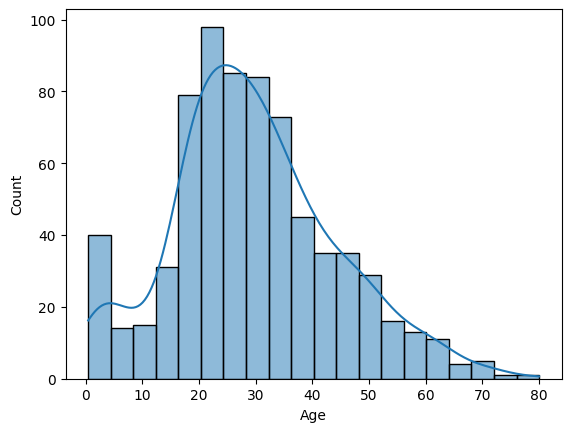

In [7]:
#check distributions

sns.histplot(df['Age'], kde=True)


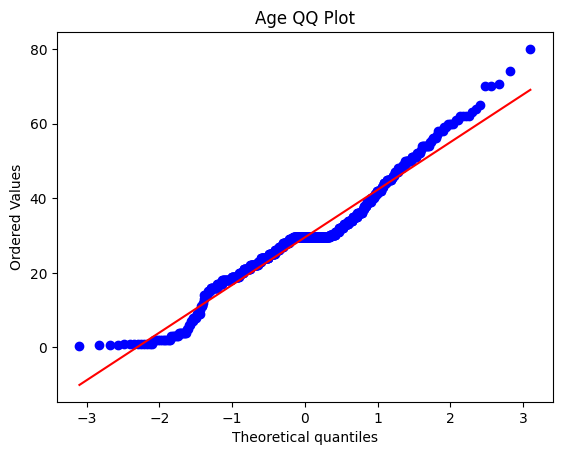

In [8]:
import scipy.stats as stats
stats.probplot(X_train['Age'], dist="norm", plot=plt)#if there are missing values then the red line doesnt appear also plot is distorted
plt.title('Age QQ Plot')
plt.show()

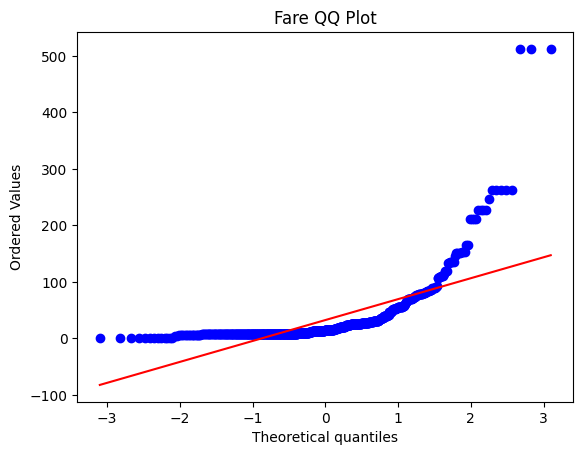

C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\fairy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

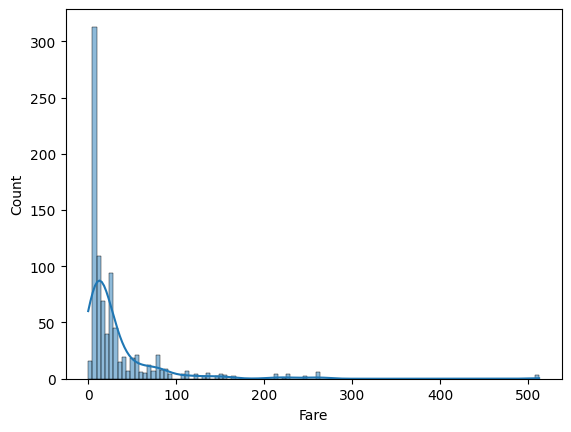

In [9]:
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')
plt.show()
sns.histplot(df['Fare'], kde=True)

In [10]:
#models
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(X_test)
y_pred_dt =clf2.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_dt))

0.6480446927374302
0.6703910614525139


In [14]:
#cross validated
df['Age'].fillna(df['Age'].mean(),inplace=True)
X = df.drop(columns=['Survived'])
y = df['Survived']


clf=LogisticRegression()
clf2 = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(clf2,X,y,scoring='accuracy',cv=10)))

0.6589013732833957
0.6565917602996254


In [15]:
#now using function transform on Fare and Age
trf = FunctionTransformer(func=np.log1p) #log function on its own can have 0 values and log0 is not defined

In [16]:
#transform the entire dataset both fare and age
X_train_tran = trf.fit_transform(X_train)
X_test_tran = trf.transform(X_test)

In [17]:
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_tran,y_train)
clf2.fit(X_train_tran,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test_tran)
y_pred_dt =clf2.predict(X_test_tran)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_dt))

0.6815642458100558
0.6871508379888268


In [19]:
#cross validation for entire log transform 
X_tran = trf.fit_transform(X)

In [20]:
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf,X_tran,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(clf2,X_tran,y,scoring='accuracy',cv=10)))

0.678027465667915
0.6577278401997503


In [23]:
#doing function transform for fare only without cross validation for single train test split
X_train_tran2 =trf2.fit_transform(X_train)
X_test_tran2 =trf2.transform(X_test)
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()

In [24]:
clf.fit(X_train_tran2,y_train)
clf2.fit(X_train_tran2,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = clf.predict(X_test_tran2)
y_pred_dt =clf2.predict(X_test_tran2)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_dt))

0.6703910614525139
0.6759776536312849


In [21]:
#using function transform only on fare
trf2 = ColumnTransformer(transformers = [
    ('Log', FunctionTransformer(func=np.log1p), ['Fare'])
    
], remainder = 'passthrough')

In [22]:
X_tran2 = trf2.fit_transform(X)
clf=LogisticRegression()
clf2 = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf,X_tran2,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(clf2,X_tran2,y,scoring='accuracy',cv=10)))
#thus transformation helps algos like logisic regression etc but have no effect on decision tree

0.6712609238451936
0.6554806491885142
